<a href="https://colab.research.google.com/github/BigSekas/WB_mirea/blob/main/Workbook4_Mironov_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1.1.1**

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

-0.928571428571429 2.0928571428571447


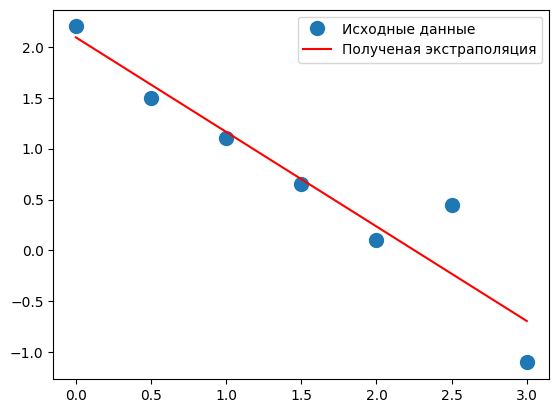

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#init
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
y = np.array([2.2, 1.5, 1.1, 0.65, 0.1, 0.45, -1.1])
A = np.vstack([x, np.ones(len(x))]).T
A

#solving on p-vector
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Полученая экстраполяция')
plt.legend()
plt.show()

**Задание 1.1.2**

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

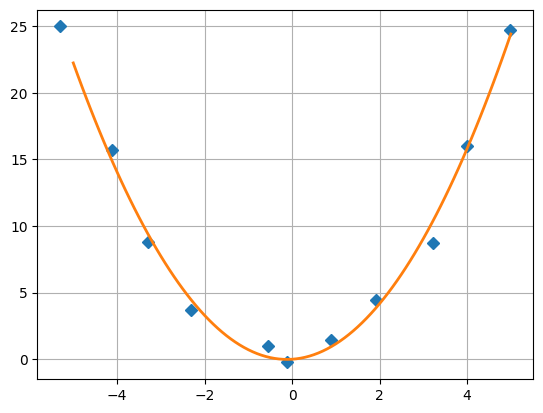

In [ ]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta*(rand(11) - 0.5)
x = x + delta*(rand(11) - 0.5)

#print(x)
#print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec + s[2], '-', lw = 2)
plt.grid()

**Задача 1.1.3**

По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

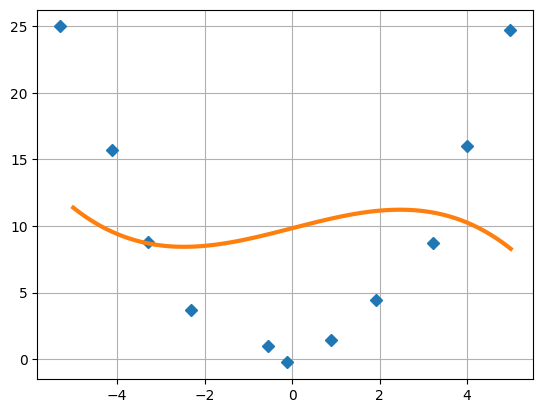

In [ ]:
from numpy import *
from numpy.random import *

m = vstack((x**3, x, ones(11))).T
s = np.linalg.lstsq(m ,y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec + s[2], '-', lw = 3)
plt.grid()
plt.savefig('Полином 3-й степени.png')

**Задание 1.1.4**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

1.434508986751115e-05
0.007421935254489882


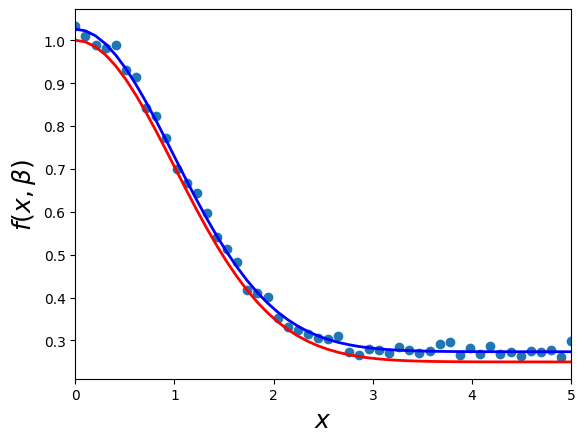

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.03336022 1.01100764 0.98925129 0.9823917  0.98902193 0.93090784
 0.91320915 0.84313826 0.82277404 0.77138027 0.70056165 0.66724383
 0.64385591 0.59727544 0.54159434 0.5136575  0.4832267  0.41679591
 0.41161354 0.40250812 0.35145864 0.33090972 0.32548673 0.31431462
 0.30538497 0.30459828 0.31098487 0.27388415 0.26583362 0.27976857
 0.27808729 0.27137673 0.28424056 0.27817746 0.26992219 0.27553696
 0.29184252 0.29675479 0.26617891 0.28

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

beta=(0.25, 0.75,0.5)

def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*(x**2))

xdata = np.linspace(0, 5, 50)

y = f(xdata,*beta)

ydata = y+ 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r', lw =2 )
ax.plot(xdata, f(xdata,*beta_opt),'b', lw =2 )
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

print(xdata)
print(ydata)


**Задача 1.1.5**

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:

1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥

2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2

3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)

4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

**1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥**

[0.52384254 1.00163831]
0.007547511949392333


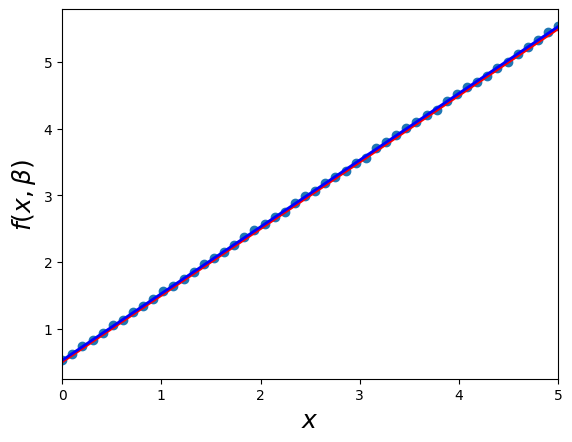

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit


beta = (0.5,1)

def f(x,b0,b1):
    return b0 + b1*x

xdata = np.linspace(0,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()


**2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2**

[0.51430461 0.75165099 1.00038021]
0.00858231063462157


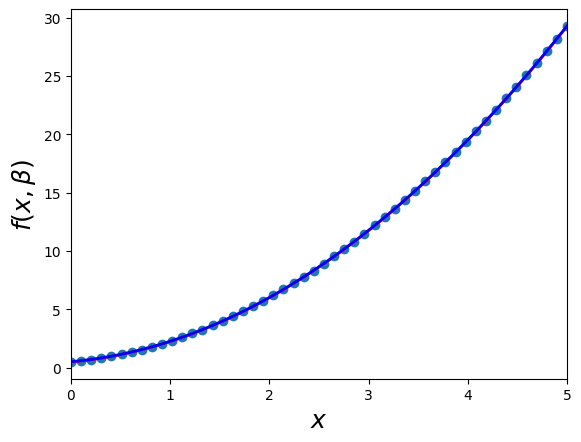

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit


beta = (0.5,0.75,1)

def f(x,b0,b1,b2):
    return b0 + b1*x+b2*x*x

xdata = np.linspace(0,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()


**3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)**

[2.02660299 3.99858157]
0.014942248952939155


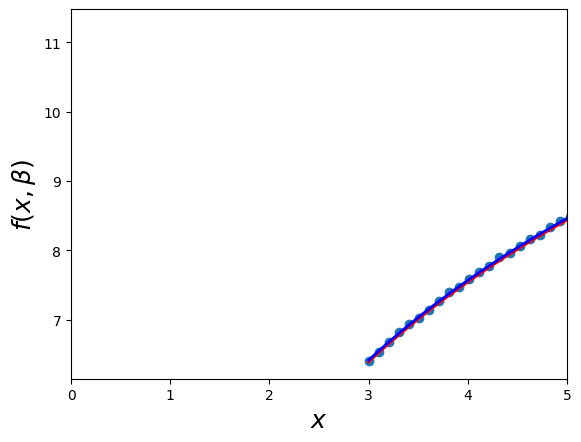

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit


beta = (2,4)

def f(x,b0,b1):
    return b0 + b1*np.log(x)

xdata = np.linspace(3,10,70)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

**4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥**𝑏1



[2.0041561  2.99884535]
0.03926341559006523


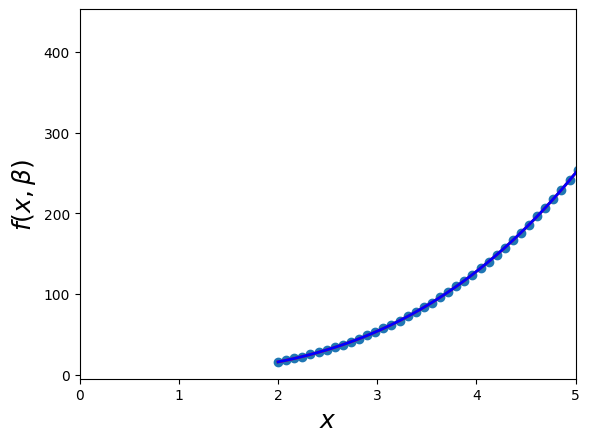

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit


beta = (2,3)

def f(x,b0,b1):
    return b0 * x **b1

xdata = np.linspace(2,6,50)

y = f(xdata, *beta)

ydata = y + 0.09 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

**Задание 1.2.1**

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
(30, 2)
       YearsExperience         Salary
count        30.000000  

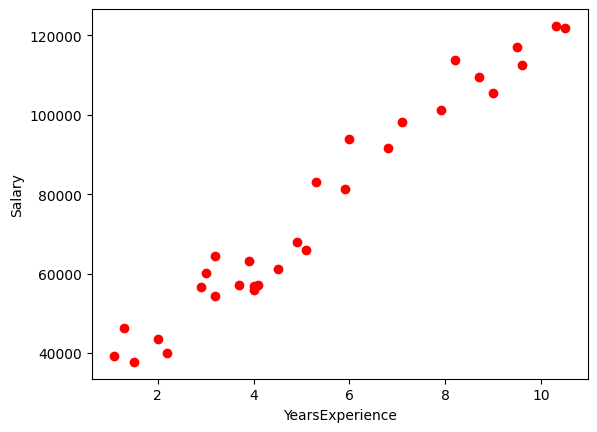

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
LinearRegression()
25825.984232150113
[9133.88237036]


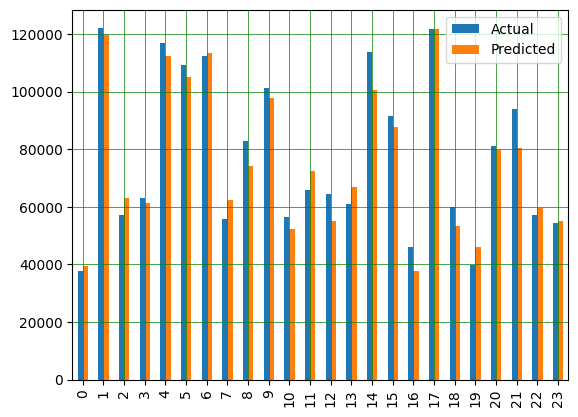

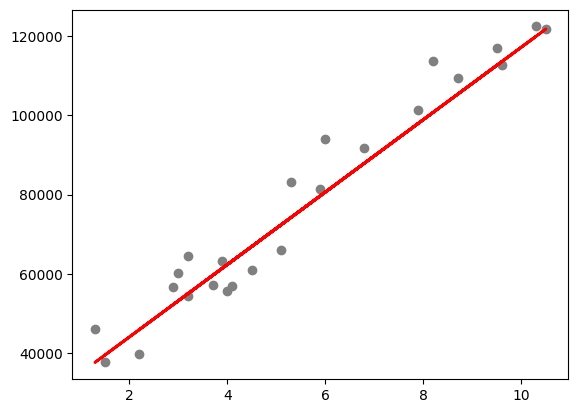

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"

df = pd.read_csv(url)


print(df)

print(df.shape)

print(df.describe())

plt.scatter(df['YearsExperience'],df["Salary"],color = 'r',label = "Salary data ")

plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.show()

X =df.iloc[:,:-1].values
y = df.iloc[:,1].values

print(X)
print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

regressor = LinearRegression()
print(regressor)

regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred =regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test,"Predicted": y_pred})


df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

plt.scatter(X_test,y_test,color = 'gray')
plt.plot(X_test,y_pred,color = 'red', linewidth= 2)
plt.show()

**Задача 1.3.3**

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset1.iloc[:, :-1],
                                                        dataset1.iloc[:, -1],
                                                        test_size=0.2,
                                                        random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2.iloc[:, :-1],
                                                        dataset2.iloc[:, -1],
                                                        test_size=0.2,
                                                        random_state=0)

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

y_pred1 = regressor1.predict(X_test1)
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print('Mean Squared Error first csv: ', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error second csv: ', metrics.mean_squared_error(y_test2, y_pred2))


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


Mean Squared Error first csv:  4666.344787588369
Mean Squared Error second csv:  0.3844711978201248


**Задача 1.3.4**

`Вариант 3`

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

[[3.  1. ]
 [3.2 1. ]
 [3.4 1. ]
 [3.6 1. ]
 [3.8 1. ]
 [4.  1. ]]
0.9999999999999987 -0.6666666666666615


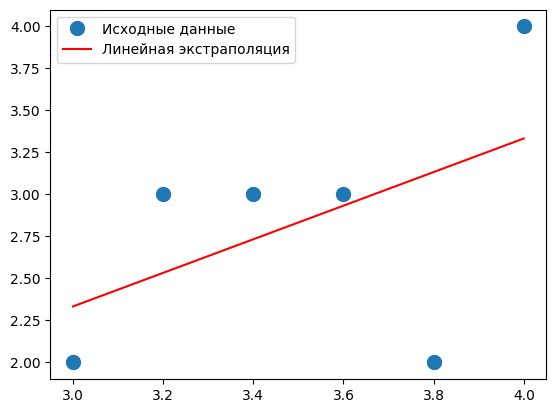

[ 0.44642857 -2.125       4.75      ]


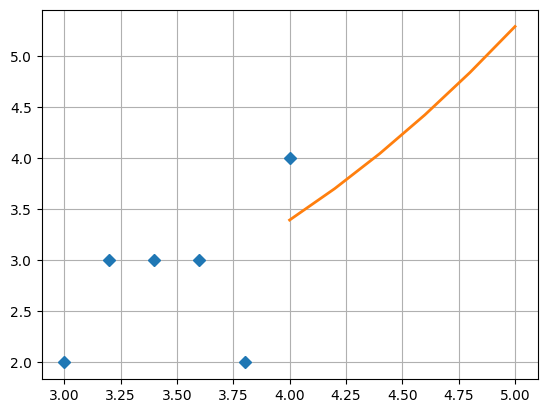

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(4, 5, 6)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
print(s)